In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras.utils import to_categorical
import tensorflow as tf
from keras.callbacks import TensorBoard

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
FLATTEN_DIM = 28 * 28
TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)

trainImages = np.reshape(train_images, (TRAINING_SIZE, FLATTEN_DIM))
testImages = np.reshape(test_images, (TEST_SIZE, FLATTEN_DIM))
print(trainImages[0])

trainImages = trainImages.astype(np.float32)
testImages = testImages.astype(np.float32)
trainImages /= 255
testImages /= 255
print(trainImages[0])

NUM_DIGITS = 10
trainLabels = to_categorical(train_labels, NUM_DIGITS)
testLabels = to_categorical(test_labels, NUM_DIGITS)
print(trainLabels[0])

model = Sequential()
model.add(Dense(units=200, activation=tf.nn.relu, input_shape=(FLATTEN_DIM,)))
model.add(Dense(units=200, activation=tf.nn.relu))
model.add(Dense(units=10, activation=tf.nn.softmax))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
tbCallback = TensorBoard(log_dir="./logs/demo70", histogram_freq=0,
                         write_graph=True, write_images=True)
model.fit(trainImages, trainLabels, epochs=20, callbacks=[tbCallback])



(60000, 28, 28)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   

In [2]:
predictedLabels = model.predict_classes(testImages)
predictedLabels[:10]


c:\users\admin\envs\tf_ml_ds_37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [3]:
predicted = model.predict(testImages)
predicted[:10]

array([[0.00000000e+00, 0.00000000e+00, 5.29712175e-38, 3.29853072e-31,
        0.00000000e+00, 4.28977665e-36, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 2.57566626e-33],
       [0.00000000e+00, 4.34798071e-37, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.07355991e-38, 1.00000000e+00, 3.15925729e-23, 1.37912052e-29,
        1.07240341e-19, 1.21542434e-26, 4.42709497e-22, 1.70853520e-16,
        2.42882952e-22, 1.91409119e-29],
       [1.00000000e+00, 3.45958567e-32, 6.28937597e-18, 3.42498793e-23,
        2.14876734e-19, 1.27552884e-18, 2.24811185e-12, 2.65399849e-21,
        1.31813538e-23, 1.49029041e-16],
       [3.66971930e-27, 6.80024317e-29, 7.52769799e-22, 1.77150723e-30,
        1.00000000e+00, 3.14148157e-24, 1.58410313e-22, 2.24329265e-16,
        4.97608529e-25, 1.02526939e-12],
       [2.16495134e-34, 1.00000000e+00, 1.21246186e-24, 4.18944411e-29,
   

In [4]:
predicted_prob = model.predict_proba(testImages)
predicted_prob[:10]

c:\users\admin\envs\tf_ml_ds_37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[0.00000000e+00, 0.00000000e+00, 5.29712175e-38, 3.29853072e-31,
        0.00000000e+00, 4.28977665e-36, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 2.57566626e-33],
       [0.00000000e+00, 4.34798071e-37, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.07355991e-38, 1.00000000e+00, 3.15925729e-23, 1.37912052e-29,
        1.07240341e-19, 1.21542434e-26, 4.42709497e-22, 1.70853520e-16,
        2.42882952e-22, 1.91409119e-29],
       [1.00000000e+00, 3.45958567e-32, 6.28937597e-18, 3.42498793e-23,
        2.14876734e-19, 1.27552884e-18, 2.24811185e-12, 2.65399849e-21,
        1.31813538e-23, 1.49029041e-16],
       [3.66971930e-27, 6.80024317e-29, 7.52769799e-22, 1.77150723e-30,
        1.00000000e+00, 3.14148157e-24, 1.58410313e-22, 2.24329265e-16,
        4.97608529e-25, 1.02526939e-12],
       [2.16495134e-34, 1.00000000e+00, 1.21246186e-24, 4.18944411e-29,
   

In [5]:
import matplotlib.pyplot as plt
def plotTestImage(index):
    plt.title("test image marked as %d, predict as %d"%(test_labels[index],predictedLabels[index]))
    plt.imshow(test_images[index],cmap='binary')
    return plt


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,970,1,1,1,1,1,2,1,1,1
1,0,1129,1,1,0,1,1,0,2,0
2,3,3,1016,2,1,0,2,3,2,0
3,0,0,5,993,0,2,0,4,2,4
4,0,1,4,0,968,0,4,3,0,2
5,4,0,0,12,3,863,3,1,3,3
6,3,3,1,1,4,6,938,0,2,0
7,0,2,6,0,1,0,0,1012,2,5
8,2,1,5,4,2,5,2,3,945,5


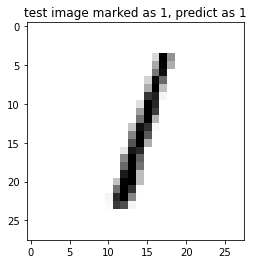

In [6]:
plotTestImage(2)
import pandas as pd
pd.crosstab(test_labels, predictedLabels, rownames=['label'], colnames=['predict'])

In [7]:
measure1 = pd.DataFrame({'label':test_labels,'predict':predictedLabels})
measure1[:10]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [8]:
measure1[(measure1.label==3)&(measure1.predict==5)]

,label,predict
3943,3,5
4740,3,5


In [11]:
errors = measure1[(measure1.label==9)&(measure1.predict==5)]

1247


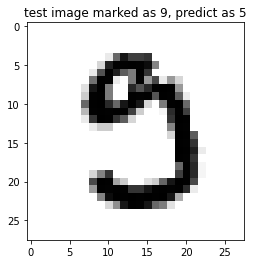

2648


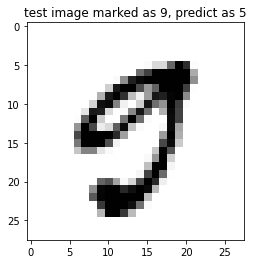

6568


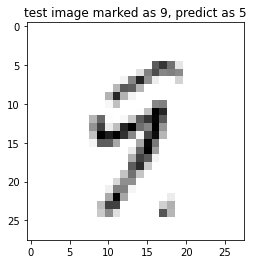

In [12]:
for errId in errors.index:
    print(errId)
    plotTestImage(errId)
    plt.show()